Epoch 1/25
9/9 [==============================] - 1s 3ms/step - loss: 0.7653 - accuracy: 0.4419
Epoch 2/25
9/9 [==============================] - 0s 3ms/step - loss: 0.6050 - accuracy: 0.6550
Epoch 3/25
9/9 [==============================] - 0s 3ms/step - loss: 0.4823 - accuracy: 0.8023
Epoch 4/25
9/9 [==============================] - 0s 3ms/step - loss: 0.3996 - accuracy: 0.8760
Epoch 5/25
9/9 [==============================] - 0s 3ms/step - loss: 0.3256 - accuracy: 0.8915
Epoch 6/25
9/9 [==============================] - 0s 3ms/step - loss: 0.2943 - accuracy: 0.8876
Epoch 7/25
9/9 [==============================] - 0s 3ms/step - loss: 0.2539 - accuracy: 0.8876
Epoch 8/25
9/9 [==============================] - 0s 4ms/step - loss: 0.2290 - accuracy: 0.9225
Epoch 9/25
9/9 [==============================] - 0s 3ms/step - loss: 0.2110 - accuracy: 0.9225
Epoch 10/25
9/9 [==============================] - 0s 3ms/step - loss: 0.1921 - accuracy: 0.9302
Epoch 11/25
9/9 [======================

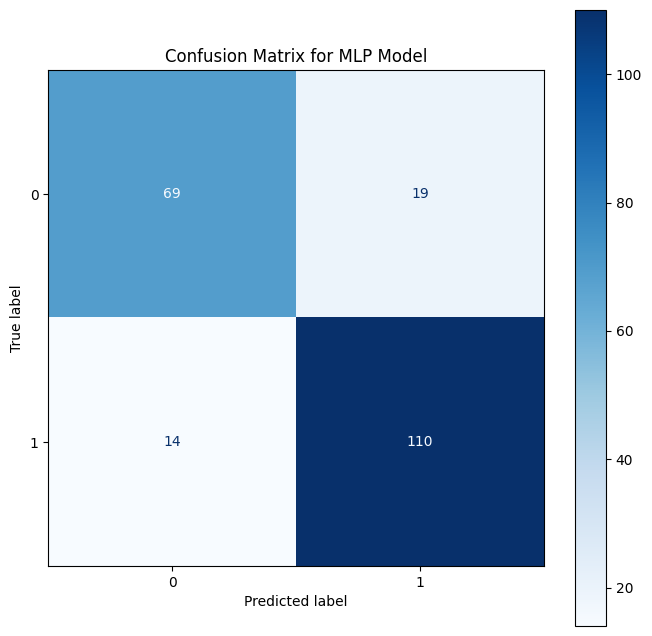

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Function to build the model
def build_model(input_dim, dropout_rate=0.25):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Load the dataset
file_path = '/Final_dataset_Classific.xlsx'
dataset = pd.read_excel(file_path)
cols_to_drop = dataset.filter(like='Medication_').columns
dataset = dataset.drop(columns=cols_to_drop)
# Split the dataset into training and test sets
train_data, test_data = train_test_split(dataset, test_size=0.45, random_state=42)

# Prepare data for the first classification task
train_data['Outcome_numerical_step1'] = train_data['Outcome_numerical'].replace(2, 0)
X_train = train_data.drop(columns=['Outcome_numerical', 'Outcome_numerical_step1'])
y_train = train_data['Outcome_numerical_step1']

# Standardize features for Step 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train the MLP for Step 1
mlp_model = build_model(input_dim=X_train_scaled.shape[1])
mlp_model.fit(X_train_scaled, y_train, epochs=25, batch_size=32, verbose=1)

# Prepare the test set for Step 1 predictions
X_test = test_data.drop(columns=['Outcome_numerical'])
X_test_scaled = scaler.transform(X_test)

# Make predictions on the test set for Step 1
test_data['Predicted_step1'] = (mlp_model.predict(X_test_scaled) > 0.5).astype(int)

# Define y_test for evaluating the performance of Step 1 predictions
y_test = test_data['Outcome_numerical'].replace(2, 0)  # Note: This should match the modification done in training
y_pred_step1 = test_data['Predicted_step1']

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_step1)
precision = precision_score(y_test, y_pred_step1, average='weighted')
recall = recall_score(y_test, y_pred_step1, average='weighted')
f1 = f1_score(y_test, y_pred_step1, average='weighted')

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_step1)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for MLP Model')
plt.show()


Epoch 1/25
8/8 [==============================] - 1s 3ms/step - loss: 0.6800 - accuracy: 0.5517
Epoch 2/25
8/8 [==============================] - 0s 3ms/step - loss: 0.5150 - accuracy: 0.7500
Epoch 3/25
8/8 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.8405
Epoch 4/25
8/8 [==============================] - 0s 3ms/step - loss: 0.3567 - accuracy: 0.8578
Epoch 5/25
8/8 [==============================] - 0s 3ms/step - loss: 0.2927 - accuracy: 0.9009
Epoch 6/25
8/8 [==============================] - 0s 3ms/step - loss: 0.2603 - accuracy: 0.9224
Epoch 7/25
8/8 [==============================] - 0s 3ms/step - loss: 0.2280 - accuracy: 0.9138
Epoch 8/25
8/8 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.9397
Epoch 9/25
8/8 [==============================] - 0s 3ms/step - loss: 0.1713 - accuracy: 0.9526
Epoch 10/25
8/8 [==============================] - 0s 4ms/step - loss: 0.1434 - accuracy: 0.9526
Epoch 11/25
8/8 [======================

1/1 [==============================] - 0s 59ms/step
Epoch 1/25
8/8 [==============================] - 1s 3ms/step - loss: 0.6691 - accuracy: 0.5603
Epoch 2/25
8/8 [==============================] - 0s 3ms/step - loss: 0.5810 - accuracy: 0.6897
Epoch 3/25
8/8 [==============================] - 0s 3ms/step - loss: 0.4654 - accuracy: 0.8233
Epoch 4/25
8/8 [==============================] - 0s 3ms/step - loss: 0.4159 - accuracy: 0.8405
Epoch 5/25
8/8 [==============================] - 0s 3ms/step - loss: 0.3496 - accuracy: 0.8836
Epoch 6/25
8/8 [==============================] - 0s 3ms/step - loss: 0.3214 - accuracy: 0.9009
Epoch 7/25
8/8 [==============================] - 0s 3ms/step - loss: 0.2622 - accuracy: 0.9052
Epoch 8/25
8/8 [==============================] - 0s 4ms/step - loss: 0.2396 - accuracy: 0.9267
Epoch 9/25
8/8 [==============================] - 0s 3ms/step - loss: 0.2198 - accuracy: 0.9224
Epoch 10/25
8/8 [==============================] - 0s 3ms/step - loss: 0.1959 - accu

1/1 [==============================] - 0s 57ms/step
Epoch 1/25
8/8 [==============================] - 1s 3ms/step - loss: 0.7160 - accuracy: 0.6121
Epoch 2/25
8/8 [==============================] - 0s 3ms/step - loss: 0.5561 - accuracy: 0.7586
Epoch 3/25
8/8 [==============================] - 0s 3ms/step - loss: 0.4513 - accuracy: 0.8664
Epoch 4/25
8/8 [==============================] - 0s 3ms/step - loss: 0.4019 - accuracy: 0.8621
Epoch 5/25
8/8 [==============================] - 0s 3ms/step - loss: 0.3437 - accuracy: 0.9009
Epoch 6/25
8/8 [==============================] - 0s 3ms/step - loss: 0.3044 - accuracy: 0.8966
Epoch 7/25
8/8 [==============================] - 0s 3ms/step - loss: 0.2724 - accuracy: 0.9181
Epoch 8/25
8/8 [==============================] - 0s 4ms/step - loss: 0.2241 - accuracy: 0.9181
Epoch 9/25
8/8 [==============================] - 0s 3ms/step - loss: 0.2212 - accuracy: 0.9138
Epoch 10/25
8/8 [==============================] - 0s 3ms/step - loss: 0.1803 - accu

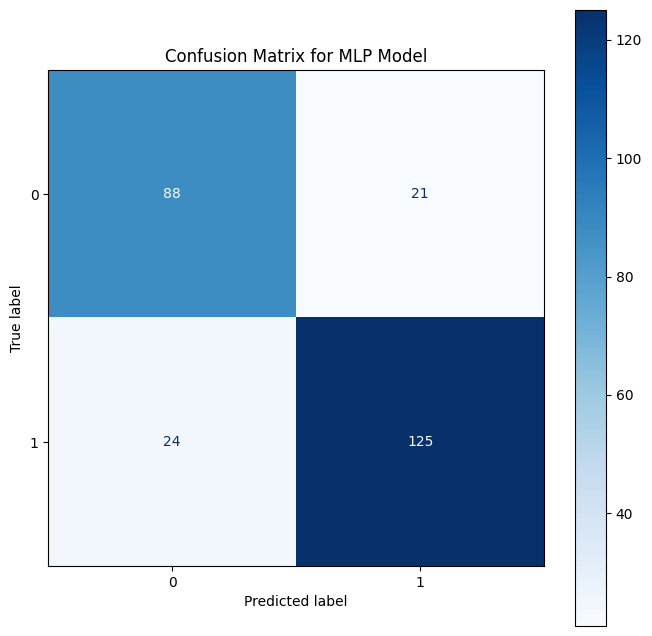

In [ ]:
import seaborn as sns

# Function to build the model
def build_model(input_dim, dropout_rate=0.25):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Bootstrap function for calculating CI of accuracy
def bootstrap_accuracy(y_true, y_pred, n_iterations=1000):
    bootstrap_accuracies = []
    for i in range(n_iterations):
        indices = resample(np.arange(len(y_true)), replace=True)
        sampled_y_true = y_true[indices]
        sampled_y_pred = y_pred[indices]
        bootstrap_accuracies.append(accuracy_score(sampled_y_true, sampled_y_pred))
    return np.percentile(bootstrap_accuracies, [2.5, 97.5])

# Load the dataset
file_path = '/content/Final_dataset_Classific.xlsx'
dataset = pd.read_excel(file_path)
cols_to_drop = dataset.filter(like='Medication_').columns
dataset = dataset.drop(columns=cols_to_drop)

# Split the dataset into training and test sets
X = dataset.drop(columns=['Outcome_numerical'])
y = dataset['Outcome_numerical'].replace(2, 0)  # Assuming binary classification needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)



# K-fold cross-validation setup
n_splits = 10
kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

all_true_labels = []
all_pred_labels = []
total_scores = []

for train_idx, test_idx in kfold.split(X_train_scaled, y_train):
    model = build_model(input_dim=X_train_scaled.shape[1])
    model.fit(X_train_scaled[train_idx], y_train.iloc[train_idx], epochs=25, batch_size=32, verbose=1)

    y_pred = (model.predict(X_train_scaled[test_idx]) > 0.5).astype(int)
    all_true_labels.extend(y_train.iloc[test_idx])
    all_pred_labels.extend(y_pred)

# Evaluation
accuracy = accuracy_score(all_true_labels, all_pred_labels)
precision = precision_score(all_true_labels, all_pred_labels)
recall = recall_score(all_true_labels, all_pred_labels)
f1 = f1_score(all_true_labels, all_pred_labels)
conf_matrix = confusion_matrix(all_true_labels, all_pred_labels)

# Calculate 95% Confidence Interval for accuracy
confidence_interval = bootstrap_accuracy(np.array(all_true_labels), np.array(all_pred_labels))

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"95% Confidence Interval for Accuracy: {confidence_interval}")

# Confusion Matrix Visualization
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix for MLP Model')
plt.show()


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

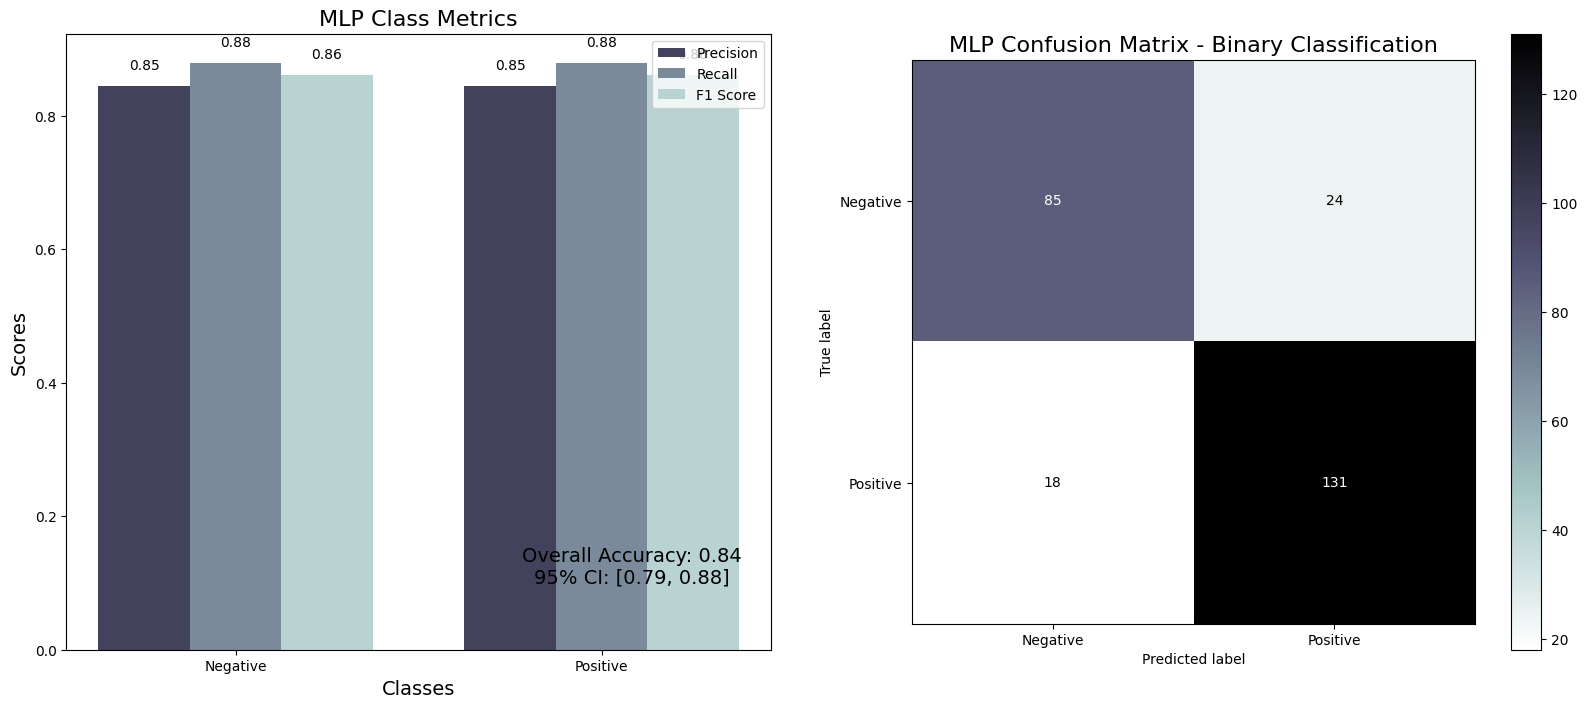

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

#cUse calculated metrics
overall_accuracy = accuracy  
overall_precision = precision
overall_recall = recall
overall_f1 = f1
confidence_interval = bootstrap_accuracy(np.array(all_true_labels), np.array(all_pred_labels))
class_labels = ['Negative', 'Positive']

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
bone_palette = plt.cm.bone(np.linspace(0.3, 0.8, 3))

# Plotting metrics
bar_width = 0.25
index = np.arange(len(class_labels))

axes[0].bar(index, [overall_precision, overall_precision], bar_width, color=bone_palette[0], label='Precision')
axes[0].bar(index + bar_width, [overall_recall, overall_recall], bar_width, color=bone_palette[1], label='Recall')
axes[0].bar(index + 2 * bar_width, [overall_f1, overall_f1], bar_width, color=bone_palette[2], label='F1 Score')

axes[0].set_xlabel('Classes', fontsize=14)
axes[0].set_ylabel('Scores', fontsize=14)
axes[0].set_title('MLP Class Metrics', fontsize=16)
axes[0].set_xticks(index + bar_width)
axes[0].set_xticklabels(class_labels)
axes[0].legend()

# Adding text annotations for clarity
for i in range(len(class_labels)):
    axes[0].text(i, overall_precision + 0.02, f'{overall_precision:.2f}', ha='center', va='bottom')
    axes[0].text(i + bar_width, overall_recall + 0.02, f'{overall_recall:.2f}', ha='center', va='bottom')
    axes[0].text(i + 2 * bar_width, overall_f1 + 0.02, f'{overall_f1:.2f}', ha='center', va='bottom')

# Adding CI and overall accuracy to the plot
axes[0].text(len(class_labels) / 1.5, 0.1, f'Overall Accuracy: {overall_accuracy:.2f}\n95% CI: [{confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}]', fontsize=14, ha='center')

# Confusion Matrix Display
conf_matrix_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)
conf_matrix_disp.plot(cmap=plt.cm.bone_r, ax=axes[1], colorbar=True)
axes[1].set_title('MLP Confusion Matrix - Binary Classification', fontsize=16)

plt.tight_layout


Epoch 1/30
10/10 [==============================] - 1s 3ms/step - loss: 0.7076 - accuracy: 0.5443
Epoch 2/30
10/10 [==============================] - 0s 3ms/step - loss: 0.5663 - accuracy: 0.7215
Epoch 3/30
10/10 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.8924
Epoch 4/30
10/10 [==============================] - 0s 3ms/step - loss: 0.3654 - accuracy: 0.9177
Epoch 5/30
10/10 [==============================] - 0s 3ms/step - loss: 0.3012 - accuracy: 0.9620
Epoch 6/30
10/10 [==============================] - 0s 3ms/step - loss: 0.2437 - accuracy: 0.9620
Epoch 7/30
10/10 [==============================] - 0s 4ms/step - loss: 0.2031 - accuracy: 0.9747
Epoch 8/30
10/10 [==============================] - 0s 3ms/step - loss: 0.1406 - accuracy: 0.9937
Epoch 9/30
10/10 [==============================] - 0s 3ms/step - loss: 0.1145 - accuracy: 0.9937
Epoch 10/30
10/10 [==============================] - 0s 3ms/step - loss: 0.0792 - accuracy: 1.0000
Epoch 11/30
10/10 [

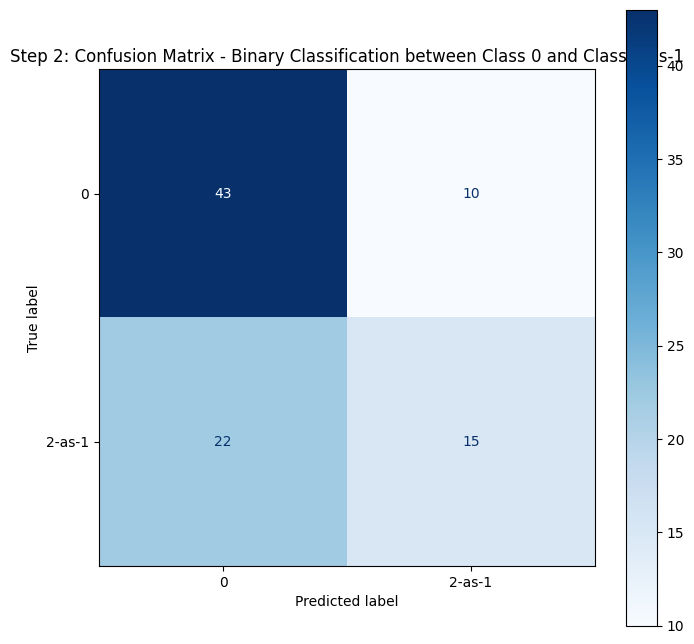

In [ ]:
from imblearn.over_sampling import SMOTE

# Function to build the MLP model
def build_model_step2(input_dim, dropout_rate=0.2):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid') 
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


# Prepare the training data for Step 2 (binary classification: class 0 vs class 2-as-1)
train_data_step2 = train_data[train_data['Outcome_numerical'] != 1]
X_train_step2 = train_data_step2.drop(columns=['Outcome_numerical', 'Outcome_numerical_step1'])
y_train_step2 = train_data_step2['Outcome_numerical'].replace(2, 1)

# Standardize features for Step 2
scaler_step2 = StandardScaler()
X_train_step2_scaled = scaler_step2.fit_transform(X_train_step2)

# Apply SMOTE for Step 2 to handle class imbalance
smote_step2 = SMOTE(random_state=42)
X_train_step2_smote, y_train_step2_smote = smote_step2.fit_resample(X_train_step2_scaled, y_train_step2)

# Train the MLP for Step 2
mlp_model_step2 = build_model_step2(input_dim=X_train_step2_smote.shape[1])
mlp_model_step2.fit(X_train_step2_smote, y_train_step2_smote, epochs=30, batch_size=16, verbose=1)

# Prepare the test set for Step 2 predictions
test_data_step2 = test_data[test_data['Predicted_step1'] == 0]
X_test_step2 = test_data_step2.drop(columns=['Outcome_numerical', 'Predicted_step1'])
X_test_step2_scaled = scaler_step2.transform(X_test_step2)
y_test_step2 = test_data_step2['Outcome_numerical'].replace(2, 1)  

# Make predictions for Step 2
y_pred_step2 = (mlp_model_step2.predict(X_test_step2_scaled) > 0.5).astype(int)

# Calculate and display evaluation metrics for Step 2
accuracy_step2 = accuracy_score(y_test_step2, y_pred_step2)
precision_step2 = precision_score(y_test_step2, y_pred_step2)
recall_step2 = recall_score(y_test_step2, y_pred_step2)
f1_step2 = f1_score(y_test_step2, y_pred_step2)

print(f"Step 2 Accuracy: {accuracy_step2}")
print(f"Step 2 Precision: {precision_step2}")
print(f"Step 2 Recall: {recall_step2}")
print(f"Step 2 F1 Score: {f1_step2}")

# Visualize the confusion matrix for Step 2
conf_matrix_step2 = confusion_matrix(y_test_step2, y_pred_step2)
fig, ax = plt.subplots(figsize=(8, 8))
disp_step2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_step2, display_labels=[0, '2-as-1'])
disp_step2.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Step 2: Confusion Matrix - Binary Classification between Class 0 and Class 2-as-1')
plt.show()


In [ ]:
# Adjust the Step 2 predictions as needed
test_data.loc[test_data_step2.index, 'Predicted_step2'] = y_pred_step2
test_data.loc[test_data_step2.index, 'Predicted_step2'] = test_data['Predicted_step2'].replace({1: 2})

# Function to combine predictions correctly
def combine_predictions(row):
    if row['Predicted_step1'] == 0:  
        return row['Predicted_step2']  
    else:
        return 1  # Step 1 predicted class 1, so it should be 1

# Apply function to combine predictions
test_data['Final_Prediction'] = test_data.apply(combine_predictions, axis=1)

# Evaluation with the original classes
y_true = test_data['Outcome_numerical'] 
y_pred_final = test_data['Final_Prediction']

# Calculate and display evaluation metrics for the final three-class classification
accuracy_final = accuracy_score(y_true, y_pred_final)
precision_final = precision_score(y_true, y_pred_final, average='macro')
recall_final = recall_score(y_true, y_pred_final, average='macro')
f1_final = f1_score(y_true, y_pred_final, average='macro')

print(f"Final Model Accuracy: {accuracy_final}")
print(f"Final Model Precision: {precision_final}")
print(f"Final Model Recall: {recall_final}")
print(f"Final Model F1 Score: {f1_final}")

# Visualize the final confusion matrix
conf_matrix_final = confusion_matrix(y_true, y_pred_final)
fig, ax = plt.subplots(figsize=(8, 8))
disp_final = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_final, display_labels=['Class 0', 'Class 1', 'Class 2'])
disp_final.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Final Confusion Matrix - Three-Class Classification')
plt.show()

In [ ]:
# 'y_pred_step2' is a numpy array where 1 needs to be changed back to 2
y_pred_step2 = np.where(y_pred_step2 == 1, 2, y_pred_step2)

# Verify indices before assignment
if set(test_data_step2.index).issubset(test_data.index):
    test_data.loc[test_data_step2.index, 'Predicted_step2'] = y_pred_step2
else:
    print("Index mismatch detected.")

# Combine Step 1 and Step 2 predictions into a final classification result
def combine_predictions(row):
    if row['Predicted_step1'] == 1:
        return 1  # Direct classification as class 1
    else:
        return row['Predicted_step2'] 

# Apply combination only if 'Predicted_step2' has been successfully set
if 'Predicted_step2' in test_data.columns:
    test_data['Final_Prediction'] = test_data.apply(combine_predictions, axis=1)

    # Evaluation with the original classes
    y_true = test_data['Outcome_numerical'] 
    y_pred_final = test_data['Final_Prediction']

    # Calculate evaluation metrics
    accuracy_final = accuracy_score(y_true, y_pred_final)
    precision_final = precision_score(y_true, y_pred_final, average='macro')
    recall_final = recall_score(y_true, y_pred_final, average='macro')
    f1_final = f1_score(y_true, y_pred_final, average='macro')

    print(f"Final Model Accuracy: {accuracy_final:.4f}")
    print(f"Final Model Precision: {precision_final:.4f}")
    print(f"Final Model Recall: {recall_final:.4f}")
    print(f"Final Model F1 Score: {f1_final:.4f}")

    # Visualize the final confusion matrix
    conf_matrix_final = confusion_matrix(y_true, y_pred_final)
    fig, ax = plt.subplots(figsize=(8, 8))
    disp_final = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_final, display_labels=[0, 1, 2])
    disp_final.plot(cmap=plt.cm.Blues, ax=ax)
    ax.set_title('Final Confusion Matrix - Three-Class Classification')
    plt.show()
else:
    print("Final predictions were not set due to index mismatch.")


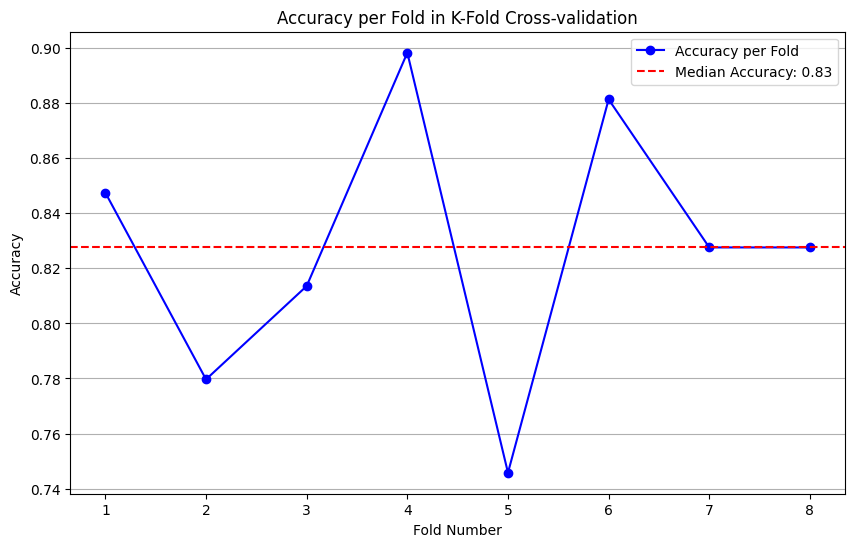

In [ ]:
fold_numbers = list(range(1, n_splits + 1))
median_accuracy = np.median(total_scores)

plt.figure(figsize=(10, 6))
plt.plot(fold_numbers, total_scores, '-o', color='blue', label='Accuracy per Fold')
plt.axhline(y=median_accuracy, color='red', linestyle='--', label=f'Median Accuracy: {median_accuracy:.2f}')

plt.title('Accuracy per Fold in K-Fold Cross-validation')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(fold_numbers)
plt.legend()
plt.grid(axis='y')
plt.show()


In [ ]:
for metric in metrics:
    print(f"{metric}: {final_report[metric]}")
    if len(final_report[metric]) != 3:
        print(f"Warning: Missing data for {metric}. Expected 3 classes, got {len(final_report[metric])}.")


precision: {0: 0.7654251918158568, 1: 0.9237047562652401, 2: 0.572695707070707}
recall: {0: 0.7610294117647058, 1: 0.9120798319327731, 2: 0.5892857142857142}
f1-score: {0: 0.7562949593302893, 1: 0.916720960277579, 2: 0.5625068558892088}


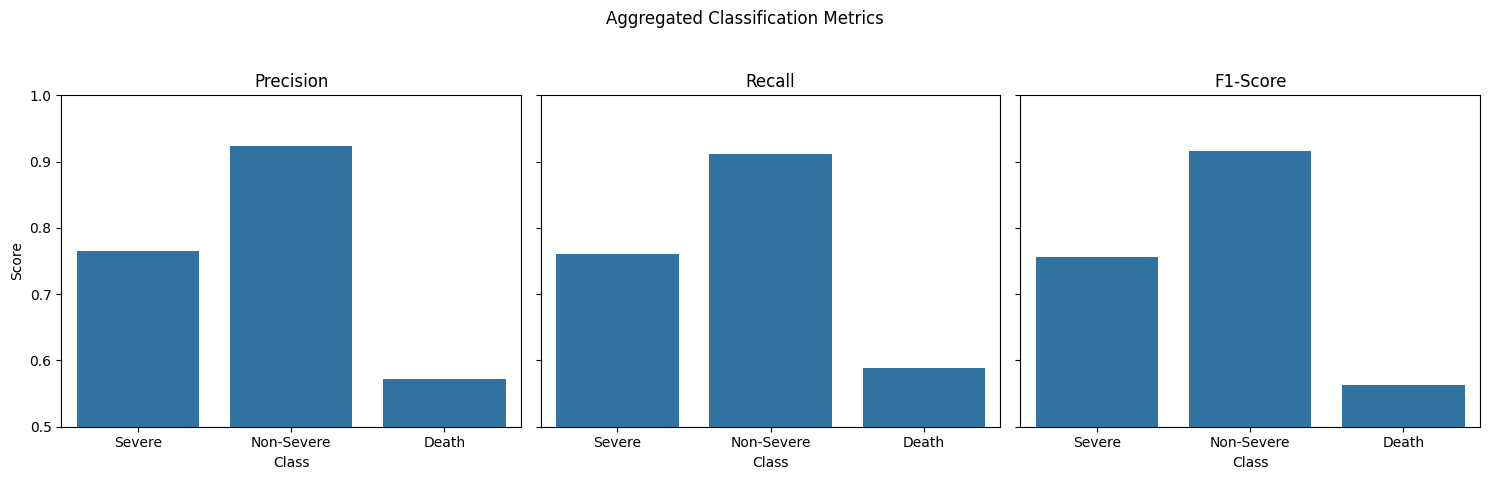

In [ ]:
metrics = ['precision', 'recall', 'f1-score']
class_labels = ['Severe', 'Non-Severe', 'Death']

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)
fig.suptitle('Aggregated Classification Metrics')

# Loop through each metric and create a bar plot
for i, metric in enumerate(metrics):
    # Retrieve values for each class
    values = [final_report[metric][label] for label in range(3)]
    sns.barplot(ax=axes[i], x=class_labels, y=values)
    axes[i].set_title(metric.title())
    axes[i].set_ylim(0.5, 1)
    axes[i].set_ylabel('Score')
    axes[i].set_xlabel('Class')

# Adjust layout for better readability and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# Evaluate model on the original, unshuffled test set
original_scores = model.evaluate(X_test_np, y_test, verbose=0)
original_accuracy = original_scores[1]

In [ ]:
# Check the computed feature importances
print(sorted_features)  
# This will print out the features sorted by their importance

[('ABSLYMPHOCYTES', -0.004716992378234863), ('FERRITIN', -0.009433954954147339), ('AGE', -0.02358490228652954), ('GENDER', -0.02358490228652954), ('Systolic_BP', -0.02358490228652954), ('Diastolic_BP', -0.02358490228652954), ('PULSE RATE', -0.02358490228652954), ('TEMP', -0.02358490228652954), ('PH', -0.02358490228652954), ('PO2', -0.02358490228652954), ('PCO2', -0.02358490228652954), ('HCO3', -0.02358490228652954), ('WHO score', -0.02358490228652954), ('WBC', -0.02358490228652954), ('LDH', -0.02358490228652954), ('CPK', -0.02358490228652954), ('CRP', -0.02358490228652954), ('PERLYMPHOCYTES', -0.02358490228652954), ('Hb', -0.02358490228652954), ('PLT', -0.02358490228652954), ('INR', -0.02358490228652954), ('APTT', -0.02358490228652954), ('D-DIMERS_cleaned', -0.02358490228652954), ('K', -0.02358490228652954), ('NA', -0.02358490228652954), ('UREA', -0.02358490228652954), ('CR', -0.02358490228652954), ('BIL', -0.02358490228652954), ('DIRECT BIL', -0.02358490228652954), ('SGOT', -0.0235849

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


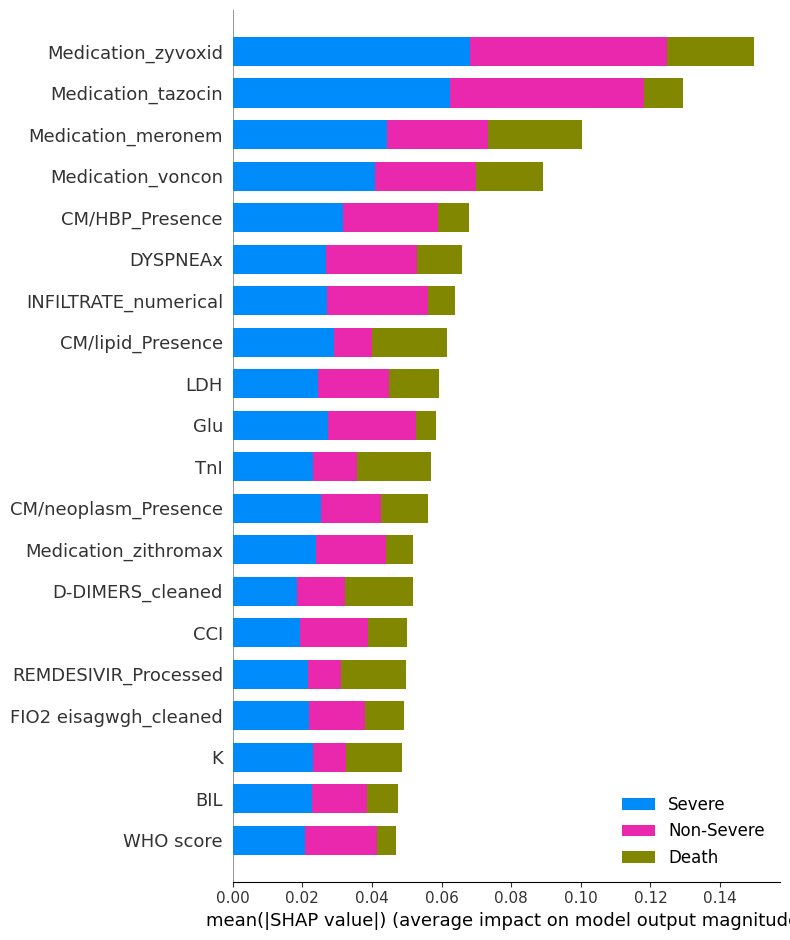

In [ ]:
import shap

# Convert X_test to a NumPy array
X_test_np = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test
# But for background data, it's often better to use the original scale for interpretability
background_data = X_train_scaled[:subset_size]
subset_size = 470
explainer = shap.DeepExplainer(model, background_data)

# Calculate SHAP values for a subset of the test data.
shap_values = explainer.shap_values(X_test_scaled[:subset_size])

feature_names = dataset.columns.drop('Outcome_numerical')

# Plot the feature importance summary
shap.summary_plot(shap_values, X_test_np[:subset_size], feature_names=feature_names.tolist(), class_names=['Severe', 'Non-Severe', 'Death'])

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 8.9 MB/s eta 0:00:00


In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=940f5f0bd1ff559acb62c544d5de63b06b24c0319ae09d0bd75fa5a4f856dfb8
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
X_test = X_test.reset_index(drop=True)

In [ ]:
import numpy as np
from lime.lime_tabular import LimeTabularExplainer
import tensorflow as tf

# Reset index to ensure direct row access
X_test_reset = X_test.reset_index(drop=True)

# Initialize a LIME explainer object
explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=feature_names.tolist(),
    class_names=class_names,
    mode='classification'
)

i = 20  
exp = explainer.explain_instance(data_row=X_test_reset.iloc[i].to_numpy(), predict_fn=predict_function, num_features=20)

# Display the explanation
exp.show_in_notebook(show_table=True, show_all=False)


157/157 [==============================] - 0s 1ms/step
